In [197]:
using Images, FileIO, Plots

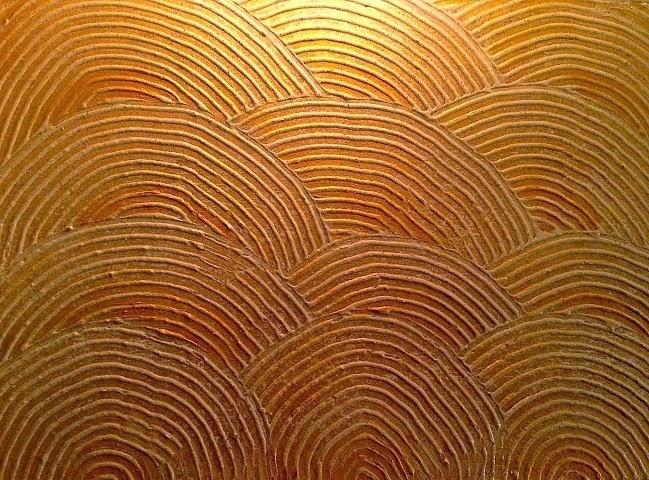

In [221]:
path = "texture.jpg"
img = load(path)

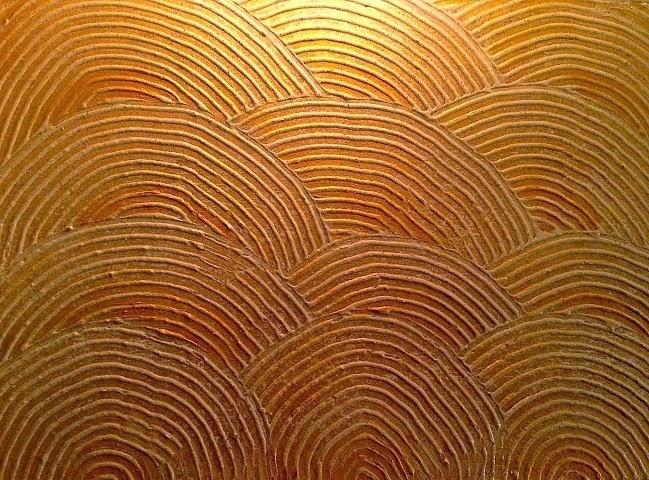

In [222]:
height, width = size(img)
metal = Array{RGB{Float64},2}(undef,height,width)
for x ∈ 1:height
    for y ∈ 1:width
        metal[x,y] = RGB(img[x,y].r, img[x,y].g, img[x,y].b)
    end
end
metal

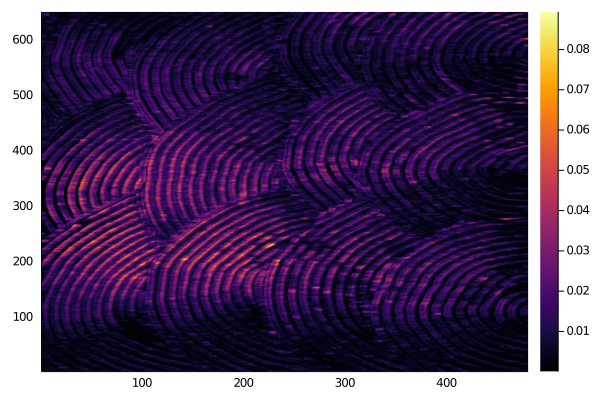

In [317]:
m = copy(metal)
height, width = size(m)

avg(val::RGB) = (val.r + val.g + val.b) / 3

function predict(m, x, y, ks,weights)
    if ks % 2 == 0 throw("Kernal size should be odd") end
    offset = Int(floor(ks / 2))
    window = Array{RGB{Float64}, 2}(undef, ks, ks)
    height, width = size(m)
    for xw ∈ (x-offset):(x+offset)
        for yw ∈ (y-offset):(y+offset)
            x′ = min(max(xw, 1), height)
            y′ = min(max(yw, 1), width)
            window[x-xw+offset+1, y-yw+offset+1] = m[x′,y′]
        end
    end
    averageVal = 0
    pixels = []
    totalWeight = 0
    for x ∈ 1:ks
        for y ∈ 1:ks
            totalWeight += weights[x,y]
        end
    end
    for x ∈ 1:ks
        for y ∈ 1:ks
            averageVal += (avg(window[x,y]) * weights[x,y])/totalWeight
        end
    end
    diff = 0
    for x ∈ 1:ks
        for y ∈ 1:ks
            diff += (avg(window[x,y]) - averageVal)^2 * (weights[x,y]/totalWeight)
        end
    end
    return diff
end

ks = 7
weights = reshape(rand(ks^2), (ks,ks))
for x ∈ 1:(size(weights)[1])
    for y ∈ 1:(size(weights)[2])
        weights[x,y] = 0
    end
end
weights[:,4] .= 3
weights[:,3] .= 1
weights[:,5] .= 1
mGen = Array{RGB{Float64},2}(undef,height,width)
for x ∈ 1:height
    for y ∈ 1:width
        val = predict(m,x,y,ks,weights)
        mGen[x,y] = RGB(val,val,val)
    end
end

mGenHeat = Array{Float64,1}(undef,height*width)
for x ∈ 1:height
    for y ∈ 1:width
        mGenHeat[(x-1)*width + y] = avg(mGen[x,y])
    end
end
heatmap(reshape(mGenHeat, (width, height)))

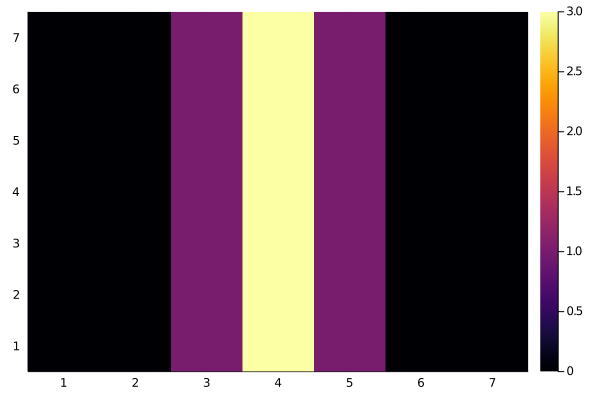

In [297]:
heatmap(weights)